In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataset=load_iris()

In [5]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df=pd.DataFrame(dataset.data,columns=dataset["feature_names"])

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df["target"]=dataset.target

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
df["target_names"]=df.target.apply(lambda x: dataset.target_names[x])


In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
x=df.drop(["target","target_names"],axis="columns")

In [23]:
y=df.target

In [25]:
x_train,x_test,y_Train,y_test=train_test_split(x,y,test_size=0.2)

In [52]:
model=RandomForestClassifier(n_estimators=4000)

In [53]:
model.fit(x_train,y_Train)

RandomForestClassifier(n_estimators=4000)

In [54]:
model.predict(x_test)

array([1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 2, 0])

In [55]:
model.score(x_train,y_Train)

1.0

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm=confusion_matrix

In [58]:
y_pred=model.predict(x_test)

In [59]:
cm=cm(y_test,y_pred)

<Axes: >

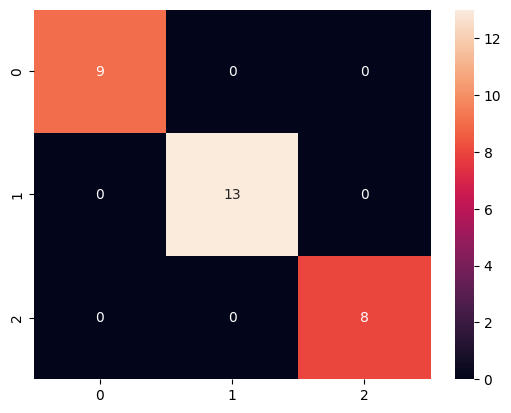

In [61]:
sns.heatmap(cm,annot=True)